In [5]:
import json

with open('study_data/mnist_times.json', 'r') as file:
    times = json.load(file)

In [6]:
methods = ['blue', 'random', 'outlier', 'maxmin', 'vas']
sizes = ['250', '375', '563', '844', '1266', '1898', '2848', '4271', '6407', '9611', '14416', '21624', '32437']

In [11]:
import numpy as np
new_times = {}
for method in methods:
    new_times[method] = []
    for size in sizes:
        new_times[method].append(times[method][size])
    new_times[method] = np.array(new_times[method]).T
    

<Figure size 1400x1200 with 0 Axes>

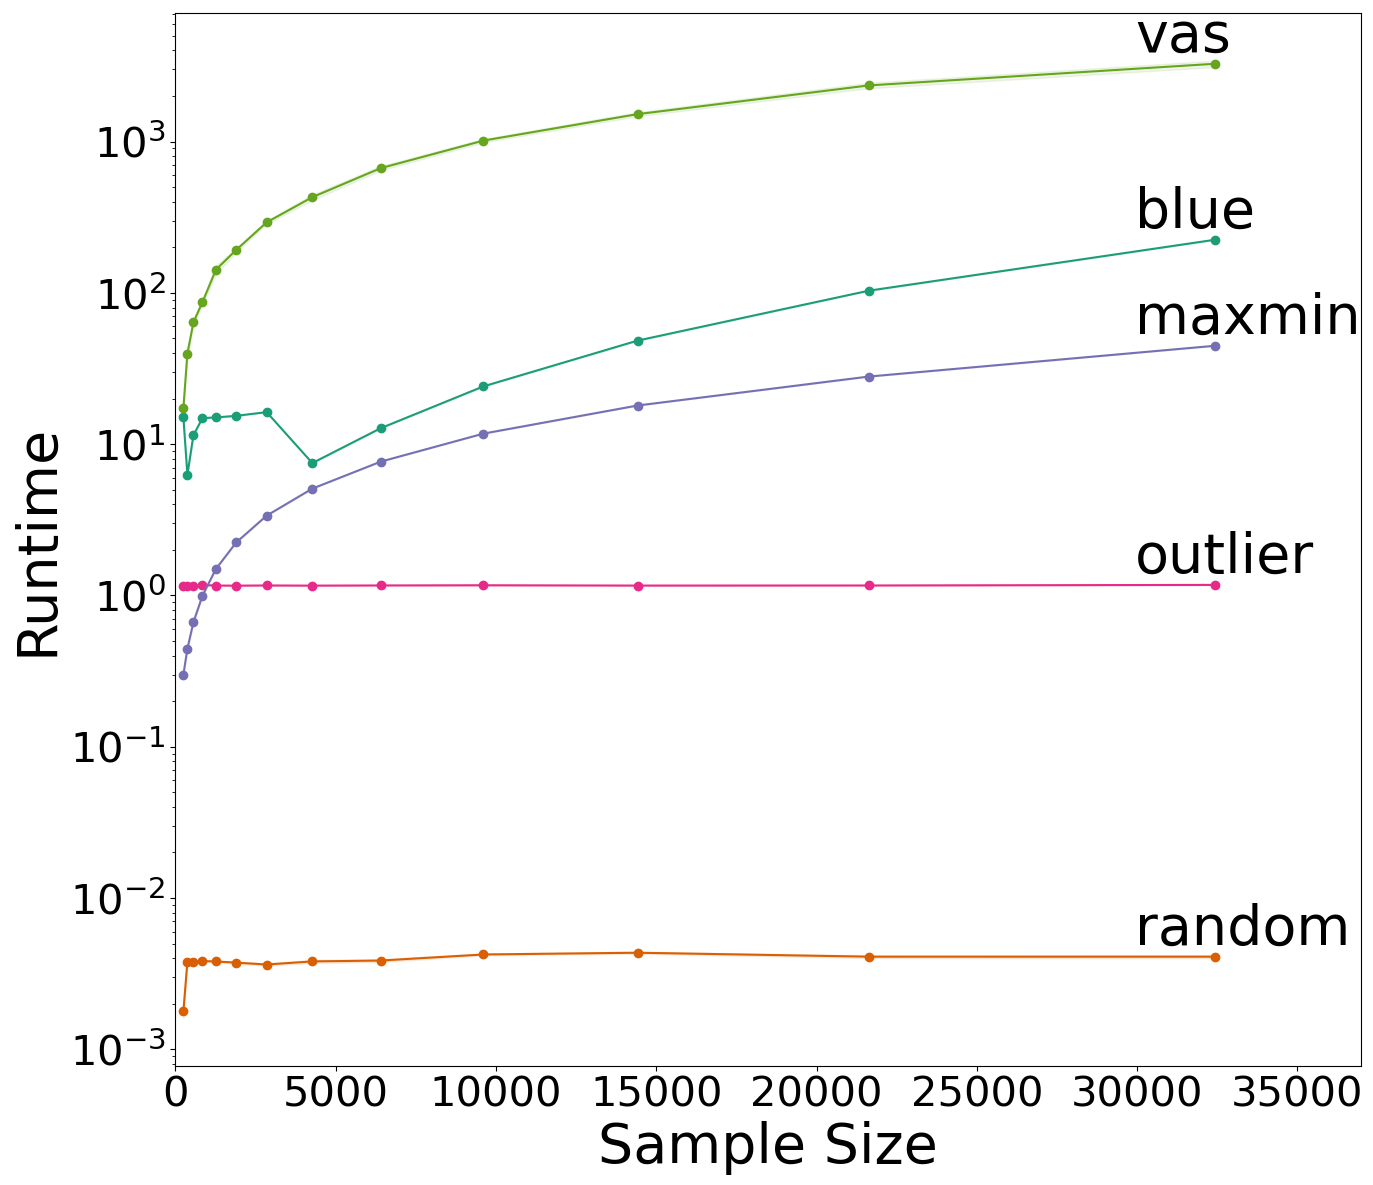

In [12]:
import matplotlib.pyplot as plt
from scipy.stats import sem

plt.rcParams['figure.figsize'] = [14,12]

sample_sizes = [int(size) for size in sizes]
colors=['#1b9e77','#d95f02','#e7298a','#7570b3','#66a61e']

plt.clf()

fig, ax = plt.subplots()

for i in range(len(methods)):
    method = methods[i]
    means = new_times[method].mean(axis=0)
    stderr = sem(new_times[method], axis=0)
    ax.set_yscale('log')
    ax.set_xlim([0,37000])
    ax.set_xlabel('Sample Size', fontsize=40)
    ax.set_ylabel('Runtime', fontsize=40)
    ax.tick_params(axis='both', labelsize=30)
    ax.plot(sample_sizes, means, marker='o', color=colors[i])
    ax.fill_between(sample_sizes, means-stderr, means+stderr, color=colors[i], alpha=0.1)
    ax.text(sample_sizes[-1]-2500,means[-1]*1.2, f'{method}', fontsize=40)


fig.tight_layout()

plt.savefig('study_data/experiment_runtimes/mnist_all_log.png', facecolor='white')

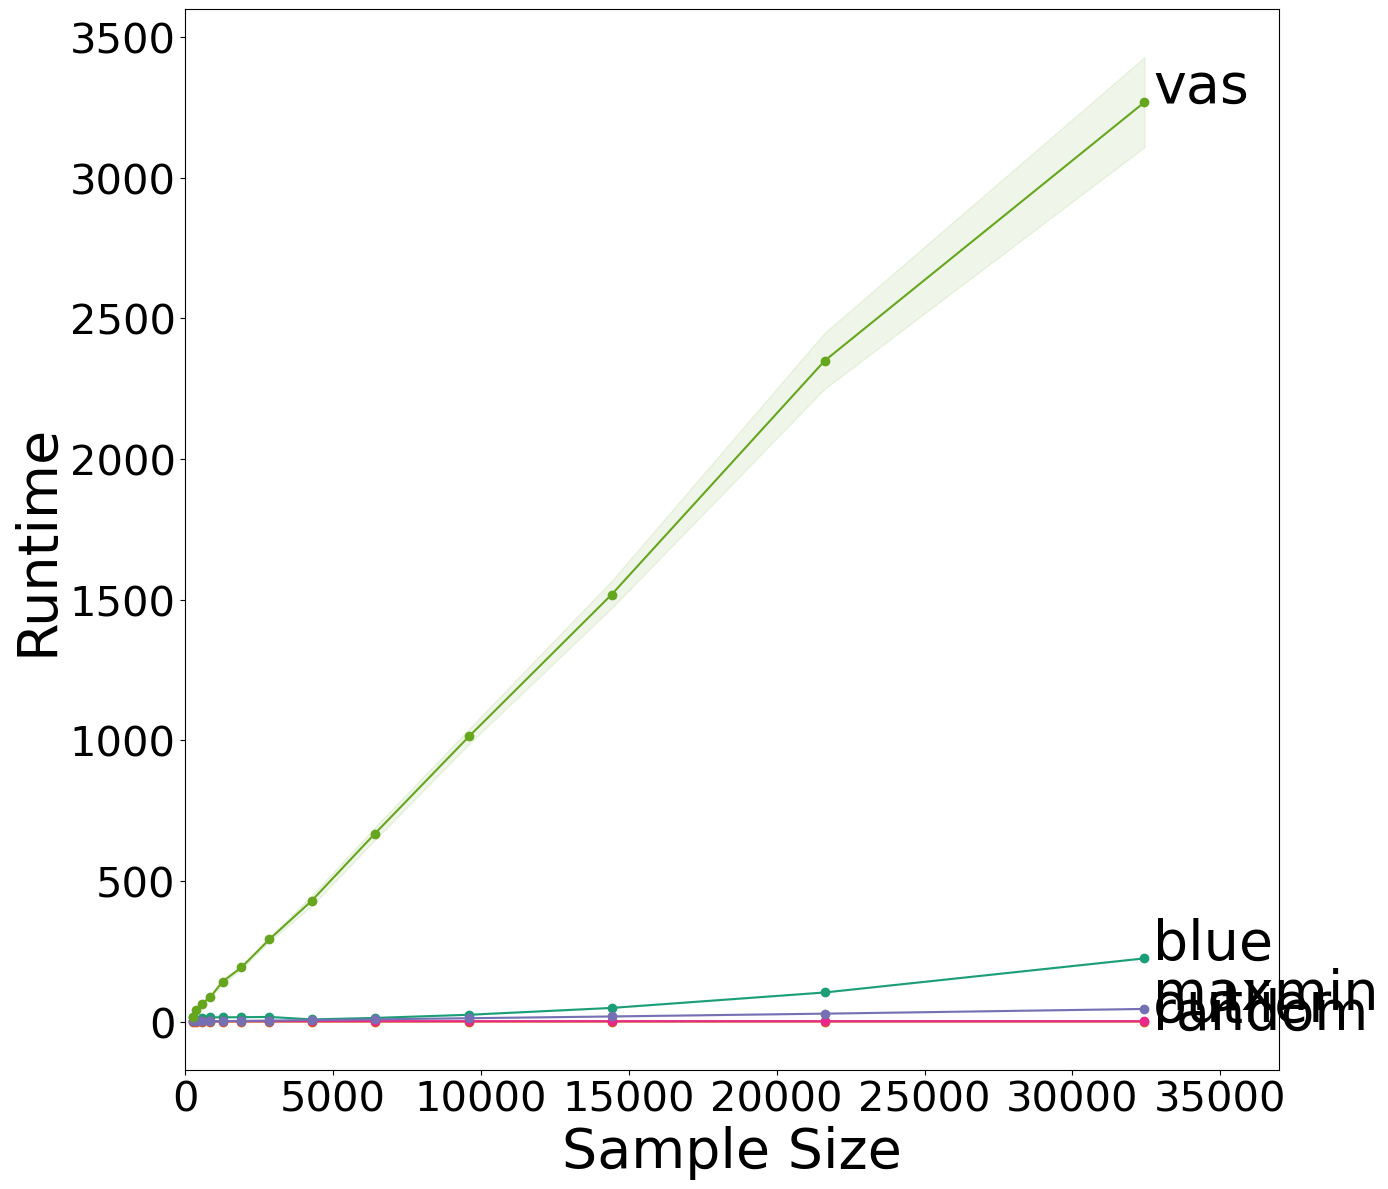

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import sem

plt.rcParams['figure.figsize'] = [14,12]

fig, ax = plt.subplots()

for i in range(len(methods)):
    method = methods[i]
    means = new_times[method].mean(axis=0)
    stderr = sem(new_times[method], axis=0)
    ax.set_xlabel('Sample Size', fontsize=40)
    ax.set_ylabel('Runtime', fontsize=40)
    ax.tick_params(axis='both', labelsize=30)
    ax.plot(sample_sizes, means, marker='o', color=colors[i])
    ax.fill_between(sample_sizes, means-stderr, means+stderr, color=colors[i], alpha=0.1)
    ax.text(sample_sizes[-1]+300, means[-1] if method != 'random' else -25, f'{method}', fontsize=40)

ax.set_xlim([0,37000])

fig.tight_layout()
plt.savefig('study_data/experiment_runtimes/fraud_all.png', facecolor='white')    